### Assignment_2: Unsupervised Data Mining

Q1. 30 Points

Q2. 30 Points

Q3. 20 Points

Q4. 20 Points

Q5. 10 Bonus Points

In [3]:

%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn
import pickle

from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state
from sklearn.decomposition import PCA

#from nose.tools import assert_equal, assert_is_instance, assert_is_not
from numpy.testing import assert_array_equal, assert_array_almost_equal, assert_almost_equal
from pandas.testing import assert_frame_equal

In [5]:
import pytest
import unittest

##### The things you should pay attention:

Make sure you fill in any place that says YOUR CODE HERE. Do not write your answer in anywhere else other than where it says YOUR CODE HERE. Anything you write anywhere else will be removed or overwritten by the autograder.

Before you submit your assignment, make sure everything runs as expected. If you have sufficient time, please go to menubar, select Kernel, and restart the kernel and run all cells (Restart & Run all).

Make sure that you save your work (in the menubar, select File → Save and CheckPoint)

Good Luck!

UP

### Problem_1: Dimension Reduction

With Problem_1, we aim to have a better understanding of dimension reduction with PCA. We will use Delta Airline data. Delta and other major airlines have data on all of their aircrafts on their website. [e.g.](https://www.delta.com/content/www/en_US/traveling-with-us/airports-and-aircraft/Aircraft.html)

We will use delta.csv uploaded on Canvas Module for this assignment.

This data set has 34 columns (including the names of the aircrafts) on 44 aircrafts. It inclues both quantitative measurements such as cruising speed, accommodation and range in miles, as well as categorical data, such as whether a particular aircraft has Wi-Fi or video. These binary are assigned values of either 1 or 0, for yes or no respectively.

In [10]:
df = pd.read_csv('delta.csv', index_col='Aircraft')


In [12]:
df.head()

,Seat Width (Club),Seat Pitch (Club),Seat (Club),Seat Width (First Class),Seat Pitch (First Class),Seats (First Class),Seat Width (Business),Seat Pitch (Business),Seats (Business),Seat Width (Eco Comfort),...,Video,Power,Satellite,Flat-bed,Sleeper,Club,First Class,Business,Eco Comfort,Economy
Aircraft,,,,,,,,,,,,,,,,,,,,,
Airbus A319,0.0,0,0,21.0,36.0,12,0.0,0.0,0,17.2,...,0,0,0,0,0,0,1,0,1,1
Airbus A319 VIP,19.4,44,12,19.4,40.0,28,21.0,59.0,14,0.0,...,1,0,0,0,0,1,1,1,0,0
Airbus A320,0.0,0,0,21.0,36.0,12,0.0,0.0,0,17.2,...,0,0,0,0,0,0,1,0,1,1
Airbus A320 32-R,0.0,0,0,21.0,36.0,12,0.0,0.0,0,17.2,...,0,0,0,0,0,0,1,0,1,1
Airbus A330-200,0.0,0,0,0.0,0.0,0,21.0,60.0,32,18.0,...,1,1,0,1,0,0,0,1,1,1


First, let's look at the attributes related to the aircraft physical characteristics:

Cruising Speed (mph)
Range (miles)
Engines
Wingspan (ft)
Tail Height (ft)
Length (ft)
These six variables are about in the middle of the data frame (and it's part of your task to figure out where they are located).

Write a function named plot_pairgrid() that takes a pandas.DataFrame and uses seaborn.PairGrid to visualize the attributes related to the six physical characteristics listed above. The plots on the diagonal should be histograms of corresponding attributes, and the off-diagonal should be scatter plots.

In [15]:

def plot_pairgrid(df):
    '''
    Uses seaborn.PairGrid to visualize the attributes related to the six physical characteristics.
    Diagonal plots are histograms. The off-diagonal plots are scatter plots.
    
    Parameters
    ----------
    df: A pandas.DataFrame. Comes from importing delta.csv.
    
    Returns
    -------
    A seaborn.axisgrid.PairGrid instance.
    '''
    
    # YOUR CODE HERE
    physical_characteristics = [
    "Cruising Speed (mph)",
    "Range (miles)",
    "Engines",
    "Wingspan (ft)",
    "Tail Height (ft)",
    "Length (ft)"
]
    g = sns.PairGrid(df[physical_characteristics])
    g.map_diag(sns.histplot, kde= False)
    g.map_offdiag(sns.scatterplot)
    plt.tight_layout()
    
    return g


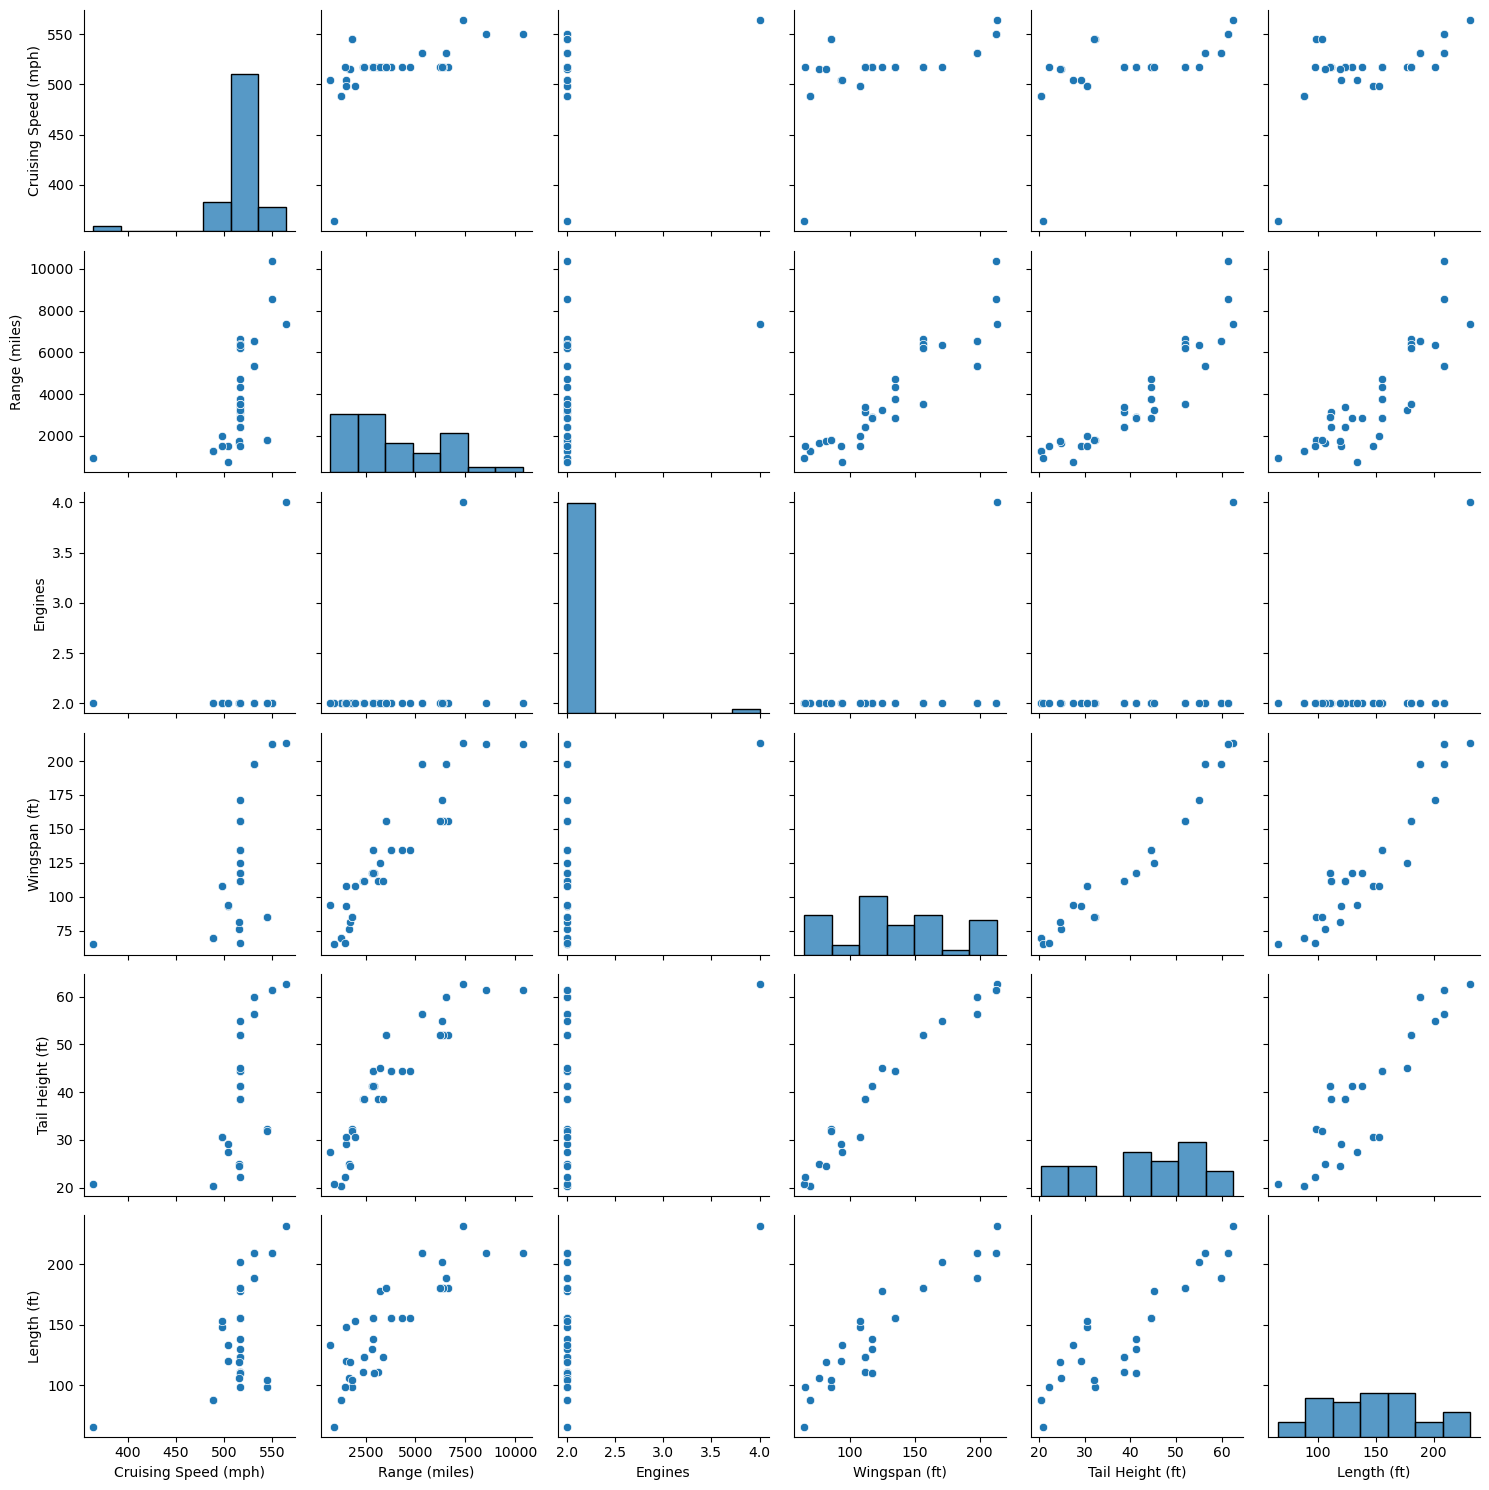

In [17]:
pg = plot_pairgrid(df) #your answer should look like this
plt.show()

In [234]:
pg = plot_pairgrid(df) #your answer should look like this

We observe that pretty strong positive correlations between all these variables, as most of them are related to the aircraft’s overall size. Remarkably there is an almost perfectly linear relationship between wingspan and tail height.

The exception here is engines. There is one outlier which has four engines, while all the other aircraft have two. In this way the engines variable is really more like a categorical variable, but we shall as the analysis progresses that this is not really important, as there are other variables which more strongly discern the aircraft from one another than this.

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.testing as npt

def test_pg():
    # Define the expected column names
    cols = ['Cruising Speed (mph)', 'Range (miles)', 'Engines',
            'Wingspan (ft)', 'Tail Height (ft)', 'Length (ft)']

    # Check that pg.fig is an instance of matplotlib's Figure
    assert isinstance(pg.fig, plt.Figure), "pg.fig is not a plt.Figure instance"
    
    # Check that pg.data has the expected columns
    assert set(pg.data.columns) == set(cols), "Data columns do not match the expected set"

    # For each axis in pg.diag_axes, check that it has exactly 10 patches
    for ax in pg.diag_axes:
        assert len(ax.patches) == 10, f"Expected 10 patches, found {len(ax.patches)}"

    # For upper triangle indices of pg.axes, compare the offsets from the collections to the input data
    for i, j in zip(*np.triu_indices_from(pg.axes, 1)):
        ax = pg.axes[i, j]
        x_in = df[cols[j]]
        y_in = df[cols[i]]
        x_out, y_out = ax.collections[0].get_offsets().T
        npt.assert_array_equal(x_in, x_out, err_msg=f"Mismatch in x values at axes[{i}, {j}]")
        npt.assert_array_equal(y_in, y_out, err_msg=f"Mismatch in y values at axes[{i}, {j}]")

    # For lower triangle indices of pg.axes, perform the same checks
    for i, j in zip(*np.tril_indices_from(pg.axes, -1)):
        ax = pg.axes[i, j]
        x_in = df[cols[j]]
        y_in = df[cols[i]]
        x_out, y_out = ax.collections[0].get_offsets().T
        npt.assert_array_equal(x_in, x_out, err_msg=f"Mismatch in x values at axes[{i}, {j}]")
        npt.assert_array_equal(y_in, y_out, err_msg=f"Mismatch in y values at axes[{i}, {j}]")

    # For the diagonal axes, assert that there are no collections
    for i, j in zip(*np.diag_indices_from(pg.axes)):
        ax = pg.axes[i, j]
        assert len(ax.collections) == 0, f"Expected 0 collections at axes[{i}, {j}], but found {len(ax.collections)}"


#### Apply PCA
I assume we dont know anything about dimensionality reduction techniques and just naively apply principle components to the data.

Write a function named fit_pca() that takes a pandas.DataFrame and uses [sklearn.decomposition.PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) to fit a PCA model on all values of df.

In [21]:
from sklearn.decomposition import PCA

def fit_pca(data, n_components):
    """
    Uses sklearn.decomposition.PCA to fit a PCA model on the given data.
    
    Parameters
    ----------
    data : pandas.DataFrame or numpy.ndarray
        The input data.
    n_components : int
        Number of principal components to keep.
    
    Returns
    -------
    pca : sklearn.decomposition.PCA instance
        The fitted PCA model.
    """
    pca = PCA(n_components=n_components)
    
    # Check if the input data is a DataFrame (has .values), if not, assume it's already an array.
    if hasattr(data, 'values'):
        data = data.values
    
    pca.fit(data)
    return pca


In [23]:
# we keep all components by setting n_components = no of cols in df. FYI df.shape[0] returns # of rows, len(df.columns) also works similar
pca_naive = fit_pca(df, n_components=df.shape[1])

In [25]:
assert isinstance(pca_naive, PCA)
assert_almost_equal(pca_naive.explained_variance_ratio_.sum(), 1.0, 3)
assert pca_naive.n_components_ ==  df.shape[1]
assert pca_naive.whiten == False

In [27]:
pca_naive.n_components_

33

In [29]:
def plot_naive_variance(pca):
    '''
    Plots the variance explained by each of the principal components.
    Attributes are not scaled, hence a naive approach.
    
    Parameters
    ----------
    pca: An sklearn.decomposition.pca.PCA instance.
    
    Returns
    -------
    A matplotlib.Axes instance.
    '''
    
    # YOUR CODE HERE
    fig, ax = plt.subplots(figsize = (8,6))
    #x axis pc number
    ax.plot(range(pca_naive.n_components_), pca.explained_variance_ratio_, marker='o')
    ax.set_xlabel('# of Dimensions')
    ax.set_ylabel('Variance Explained')
    ax.set_title('Proportion of Variance Explained')
    



    return ax

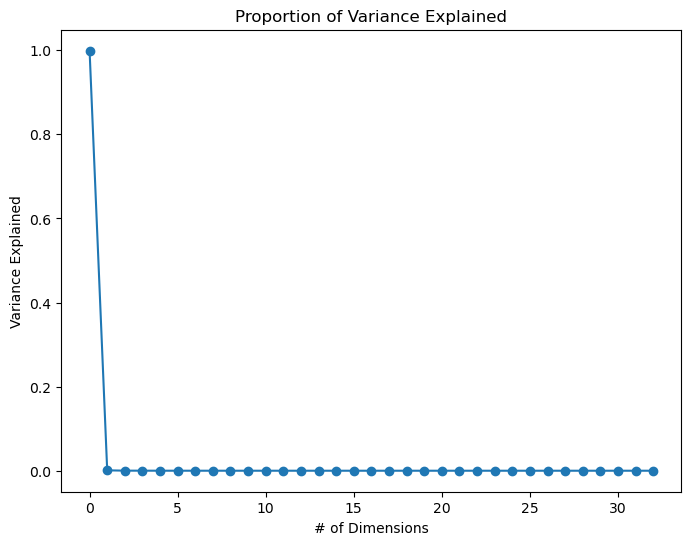

In [31]:
naive_var = plot_naive_variance(pca_naive)
plt.show()

In [33]:
assert isinstance(naive_var, mpl.axes.Axes)
assert len(naive_var.lines) == 1

assert len(naive_var.title.get_text()) > 0, "Your plot doesn't have a title."
assert not (naive_var.xaxis.get_label_text() == ''), "Change the x-axis label to something more descriptive."
assert not (naive_var.yaxis.get_label_text() == ''), "Change the y-axis label to something more descriptive."

xdata, ydata = naive_var.lines[0].get_xydata().T
assert_array_equal(xdata, list(range(df.shape[1])))
assert_array_almost_equal(ydata, pca_naive.explained_variance_ratio_)

In [35]:
abs_val = np.abs(pca_naive.components_[0])
max_pos = abs_val.argmax()
max_val = abs_val.max()

print('"{0}" accounts for {1:0.3f} % of the variance.'.format(df.columns[max_pos], max_val))

"Range (miles)" accounts for 0.999 % of the variance.


Taking this naive approach, we can see that the first principal component accounts for 99.9% of the variance in the data. (Note the y-axis is on a log scale.) Looking more closely, can we see that the first principle component is just the range in miles? This is because the scale of the different variables in the data set is quite variable.

PCA is a scale-dependent method. For example, if the range of one column is [-100, 100], while the that of another column is [-0.1, 0.1], PCA will place more weight on the feature with larger values. One way to avoid this is to standardize a data set by scaling each feature so that the individual features all look like Gausssian distributions with zero mean and unit variance. 

Please write a function named standardize() where StandardScaler function of sklearn will be used to scale each feature so that they have zero mean and unit variance.

In [293]:
#import sklearn.preprocessing

In [37]:
from sklearn.preprocessing import StandardScaler

def standardize(df):
    scaler = StandardScaler()
    scaled = scaler.fit_transform(df)
    return scaled


In [39]:
scaled = standardize(df)

In [41]:
rng = np.random.RandomState(0)
n_samples, n_features = 4, 5

df_t1 = pd.DataFrame(
    rng.randn(n_samples, n_features),
    index=[i for i in 'abcd'],
    columns=[c for c  in 'abcde']
    )
df_t1.loc[:, 'a'] = 0.0  # make first feature zero

scaled_t1 = standardize(df_t1)

#assert not(df_t1 == scaled_t1)
assert not np.allclose(df_t1.values, scaled_t1), 'Standardized data should not be the same as the original data.'
assert isinstance(scaled_t1, np.ndarray)
assert_array_almost_equal(
    scaled_t1.mean(axis=0),
    n_features * [0.0] # scaled data should have mean zero
    ) 
assert_array_almost_equal(
    scaled_t1.std(axis=0),
    [0., 1., 1., 1., 1.] # unit variance except for 1st feature
    )

In [43]:
# we keep only 10 components
n_components = 10
pca = fit_pca(scaled, n_components=n_components)

Let's take another look to the explained variance of the first 10 principal components from the scaled data.

In [46]:
def plot_scaled_variance(pca):
    '''
    Plots the variance explained by each of the principal components.
    Features are scaled with sklearn.StandardScaler.
    
    Parameters
    ----------
    pca: An sklearn.decomposition.pca.PCA instance.
    
    Returns
    -------
    A matplotlib.Axes instance.
    '''
    fig,ax = plt.subplots()
    x_data = list(range(len(pca.explained_variance_ratio_)))
    y_date = pca.explained_variance_ratio_
    ax.plot(x)        
    
    
    
    return ax

In [48]:
import matplotlib.pyplot as plt

def plot_scaled_variance(pca):
    '''
    Plots the variance explained by each of the principal components.
    Features are scaled with sklearn.StandardScaler.
    
    Parameters
    ----------
    pca : sklearn.decomposition.PCA instance.
    
    Returns
    -------
    ax : matplotlib.Axes instance.
    '''
    
    # Create a new figure and axis.
    fig, ax = plt.subplots()
    
    # Create x-data: indices for each principal component.
    # Note: This should match the number of components, which the test expects to be list(range(df.shape[1]))
    x_data = list(range(len(pca.explained_variance_ratio_)))
    
    # y-data: the explained variance ratio from the PCA model.
    y_data = pca.explained_variance_ratio_
    
    # Plot the explained variance ratio as a line with markers.
    ax.plot(x_data, y_data, marker='o')
    
    # Set a descriptive title and axis labels.
    ax.set_title("Explained Variance Ratio by Principal Component")
    ax.set_xlabel("Principal Component Index")
    ax.set_ylabel("Explained Variance Ratio")
    
    return ax

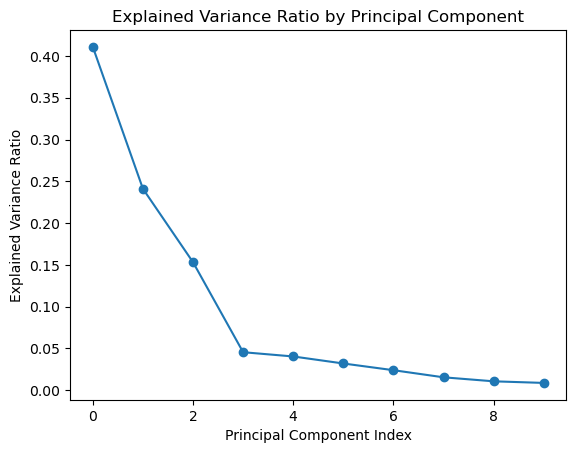

In [50]:
ax = plot_scaled_variance(pca)
plt.show()

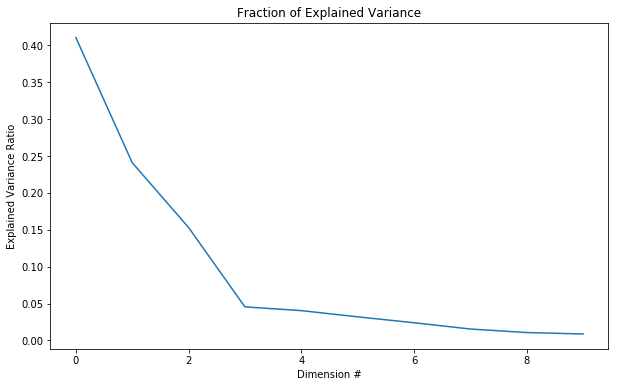

In [19]:
ax = plot_scaled_variance(pca)

In [20]:
assert_is_instance(ax, mpl.axes.Axes)
assert_equal(len(ax.lines), 1)

assert_is_not(len(ax.title.get_text()), 0, msg="Your plot doesn't have a title.")
assert_is_not(ax.xaxis.get_label_text(), '', msg="Change the x-axis label to something more descriptive.")
assert_is_not(ax.yaxis.get_label_text(), '', msg="Change the y-axis label to something more descriptive.")

xdata, ydata = ax.lines[0].get_xydata().T
assert_array_equal(xdata, list(range(n_components)))
assert_array_almost_equal(ydata, pca.explained_variance_ratio_)

Nice, it looks good to go. There are various rules of thumb for selecting the number of principal components to retain in an analysis of this type, one of which I’ve experienced about is:

Pick the number of components which explain 85% or greater of the variation.
So, we will keep the first 4 principal components (remember that we are counting from zero, so we are keeping 0th, 1st, 2nd, and 3rd components—four components). Later in this assignment, we will use these four components to fit a $k$-means model. Before we move on to the next problem, let's apply the dimensional reduction on the scaled data. (In the previous sections, we didn't actually have to apply  transform(). This step is to make sure that the scaled data is actually "transformed".)

Write a function named reduce() that takes a PCA model (that is already trained on array) and a Numpy array, and applies dimensional reduction on the array.

In [53]:
def reduce(pca, array):
    '''
    Applies the `pca` model on array.
    
    Parameters
    ----------
    pca: An sklearn.decomposition.PCA instance. which has been fitted
    
    Returns
    -------
    A Numpy array
    '''
    
    # YOUR CODE HERE
    reduced = pca.transform(array)
    
    return reduced

In [55]:
reduced = reduce(pca, scaled)

In [61]:
assert isinstance(reduced, np.ndarray)
assert_array_almost_equal(reduced, pca.fit_transform(scaled))

In [63]:
# Save the reduced data to the same directory of your notebook  as 'delta_reeuced.npy' that we will use later on
np.save('delta_reduced.npy', reduced)

### Problem 2. Clustering

We will use the first 10 principal components of the Delta Airline data set that we created in the first step.


In [69]:
##Standard imports just in case

%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn

from sklearn.utils import check_random_state
from sklearn.cluster import KMeans

#from nose.tools import assert_equal, assert_is_instance, assert_true, assert_is_not
from numpy.testing import assert_array_equal, assert_array_almost_equal, assert_almost_equal

In [71]:
## Reload the the first 10 components of delta dataset
reduced = np.load('delta_reduced.npy')

Write a function named cluster() that fits a k-means clustering algorithm, and returns a tuple (sklearn.cluster.k_means_.KMeans, np.array). The second element of the tuple is a 1-d array that contains the predictions of k-means clustering, i.e. which cluster each data point belongs to. Please remember how we were generating and using the labels for seeds, movements, iris etc.


Use default values for all parameters in KMeans() execept for n_clusters and random_state.

In [76]:
from sklearn.cluster import KMeans
import numpy as np

def cluster(array, random_state, n_clusters=4):
    '''
    Fits and predicts k-means clustering on "array"
    
    Parameters
    ----------
    array: A numpy array
        The data on which to perform clustering.
    random_state: int or RandomState instance
        The random seed for reproducibility.
    n_clusters: int, optional (default=4)
        The number of clusters to form.
    
    Returns
    -------
    A tuple (model, clusters)
    model : sklearn.cluster.k_means_.KMeans
        The fitted KMeans clustering model.
    clusters : np.ndarray
        A 1-D array of cluster labels for each data point.
    '''
    
    # Initialize the KMeans model with the given n_clusters and random_state.
    model = KMeans(n_clusters=n_clusters, random_state=random_state)
    
    # Fit the model on the input data.
    model.fit(array)
    
    # Predict the cluster labels for each data point.
    clusters = model.predict(array)
    
    # Return the fitted model and the predictions as a tuple.
    return model, clusters


In [78]:
k_means_t, cluster_t = cluster(reduced, random_state=check_random_state(1), n_clusters=5)

assert_is_instance(k_means_t, sklearn.cluster._kmeans.KMeans)
assert_is_instance(cluster_t, np.ndarray)
assert_equal(k_means_t.n_init, 10)
assert_equal(k_means_t.n_clusters, 5)
assert_equal(len(cluster_t), len(reduced))
assert_true((cluster_t < 5).all()) # n_cluster = 5 so labels should be between 0 and 5
assert_true((cluster_t >= 0).all())
labels_gold = -1. * np.ones(len(reduced), dtype=np.int)
mindist = np.empty(len(reduced))
mindist.fill(np.infty)
for i in range(5):
    dist = np.sum((reduced - k_means_t.cluster_centers_[i])**2., axis=1)
    labels_gold[dist < mindist] = i
    mindist = np.minimum(dist, mindist)
assert_true((mindist >= 0.0).all())
assert_true((labels_gold != -1).all())
assert_array_equal(labels_gold, cluster_t)

NameError: name 'assert_is_instance' is not defined

The scikit-learn documentation on sklearn.cluster.KMeans says that [Kmeans cluster](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) has the inertia value in the inertia_ attribute. So we can vary the number of clusters in KMeans, plot KMeans.inertia_ as a function of the number of clusters, and pick the "elbow" in the plot.

Always use check_random_state(0) to seed the random number generator.


In [151]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def plot_inertia(array, start=1, end=10):
    '''
    Increase the number of clusters from "start" to "end" (inclusive).
    Finds the inertia of k-means clustering for different k.
    Plots inertia as a function of the number of clusters.
    
    Parameters
    ----------
    array : numpy.ndarray
        The data on which to perform k-means clustering.
    start : int, optional (default=1)
        The starting number of clusters.
    end : int, optional (default=10)
        The ending number of clusters (inclusive).
    
    Returns
    -------
    ax : matplotlib.Axes
        The Axes instance containing the inertia plot.
    '''
    # Prepare lists to store the number of clusters and the corresponding inertia.
    inertia = []
    x_axis = list(range(start, end + 1))
    
    # Loop over the range of cluster numbers.
    for k in x_axis:
        # Initialize the KMeans model with k clusters and a fixed random_state for reproducibility.
        model = KMeans(n_clusters=k, random_state=10)
        # Fit the model on the data.
        model.fit(array)
        # Append the inertia (sum of squared distances) for this k.
        inertia.append(model.inertia_)
    
    # Create the plot.
    fig, ax = plt.subplots(figsize=(10, 6))
    
    ax.set_title('The elbow method')
    ax.set_ylabel('Inertia')
    ax.set_xlabel('Number of clusters')
    ax.plot(x_axis, inertia, marker='o')
    
    return ax


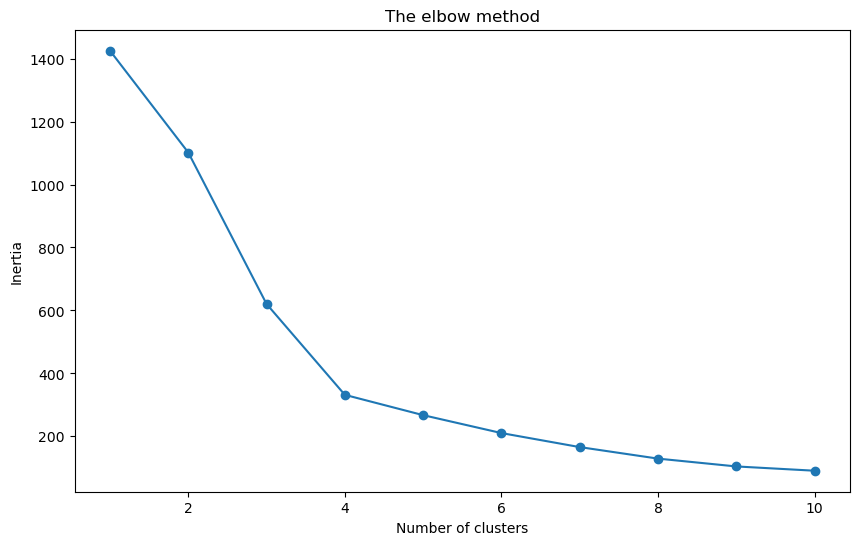

In [155]:
inertia = plot_inertia(reduced)
plt.show()

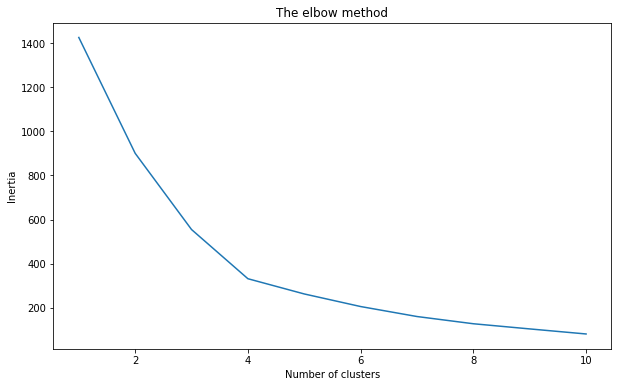

In [30]:
inertia = plot_inertia(reduced)

In [31]:
assert_is_instance(inertia, mpl.axes.Axes)
assert_true(len(inertia.lines) >= 1)

xdata, ydata = inertia.lines[0].get_xydata().T

for i in range(1, 11):
    k_means_t, cluster_t = cluster(reduced, random_state=check_random_state(0), n_clusters=i)
    assert_array_equal(xdata[i - 1], i)
    assert_almost_equal(ydata[i - 1], k_means_t.inertia_)

assert_is_not(len(inertia.title.get_text()), 0,
    msg="Your plot doesn't have a title.")
assert_is_not(inertia.xaxis.get_label_text(), '',
    msg="Change the x-axis label to something more descriptive.")
assert_is_not(inertia.yaxis.get_label_text(), '',
    msg="Change the y-axis label to something more descriptive.")

In [92]:
def plot_pair(reduced, clusters):
    '''
    Uses seaborn.PairGrid to visualize the data distribution
    when axes are the first four principal components.
    Diagonal plots are histograms. The off-diagonal plots are scatter plots.
    
    Parameters
    ----------
    reduced: A numpy array. Comes from importing delta_reduced.npy
    
    Returns
    -------
    A seaborn.axisgrid.PairGrid instance.
    '''
    
    df = pd.DataFrame(reduced)
    df['c'] = clusters
    subset = [0,1,2,3, 'c']
    columns = [0,1,2,3]
    
    ax = sns.PairGrid(df[subset], vars = columns, hue = 'c')
    ax = ax.map_diag(plt.hist)
    ax = ax.map_offdiag(plt.scatter)
    
    return ax

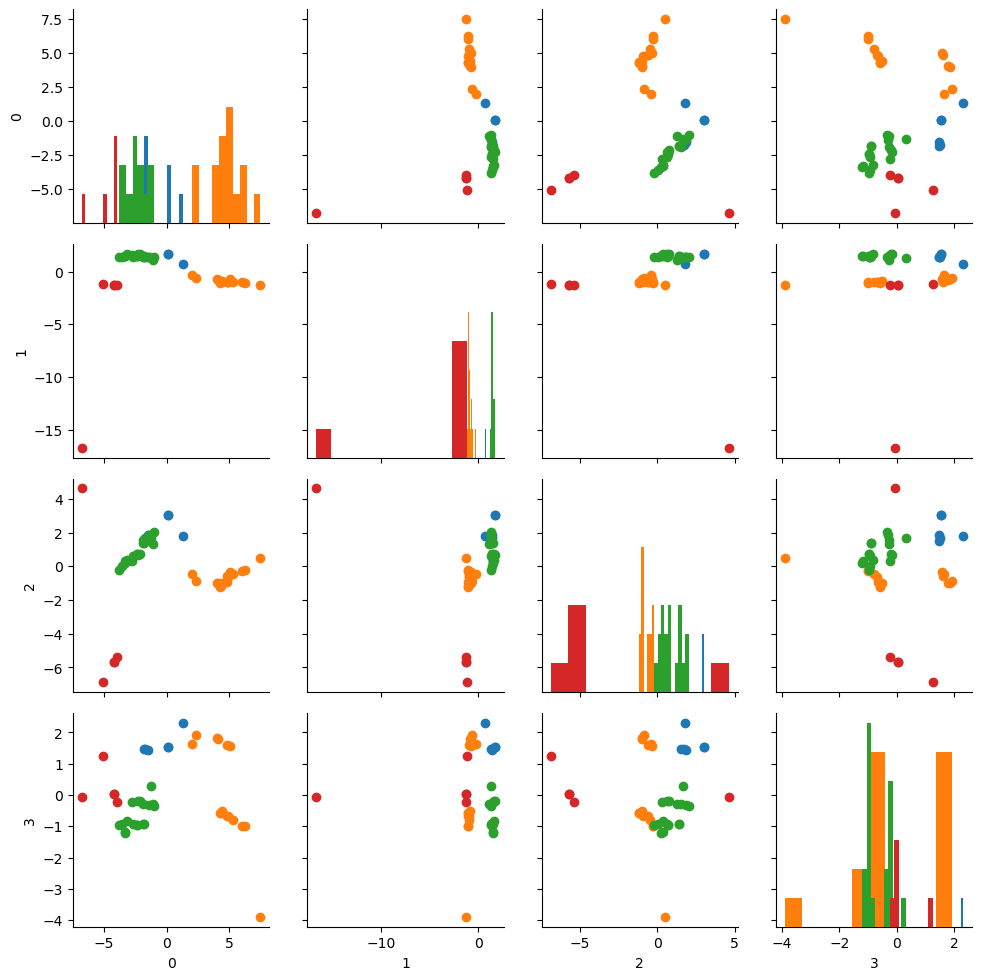

In [98]:
k_means, clusters = cluster(reduced, random_state=check_random_state(0), n_clusters=4)
pg = plot_pair(reduced, clusters)
plt.show()

We observe that the one outlier is in its own cluster, there’s 3 or 4 points in the other clusters and the remainder are split into two clusters of greater size.

In [104]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.testing as npt

# Check that pg.fig is a matplotlib Figure instance.
assert isinstance(pg.fig, plt.Figure), "pg.fig is not a plt.Figure instance."

# Verify that pg.data has at least 4 columns.
assert len(pg.data.columns) >= 4, "pg.data should have at least 4 columns."

# For each axis in pg.diag_axes, ensure there are 40 patches (i.e., 4 clusters * 10 patches each).
for ax in pg.diag_axes:
    expected_patches = 4 * 10
    assert len(ax.patches) == expected_patches, (
        f"Expected {expected_patches} patches in a diag axis, got {len(ax.patches)}."
    )

# For the upper triangle axes, compare the plotted data against the expected reduced values for cluster 0.
for i, j in zip(*np.triu_indices_from(pg.axes, 1)):
    ax = pg.axes[i, j]
    x_out, y_out = ax.collections[0].get_offsets().T
    x_in = reduced[clusters == 0, j]  # Only checking the first cluster
    y_in = reduced[clusters == 0, i]
    npt.assert_array_equal(x_in, x_out,
                           err_msg=f"Mismatch in x values at axes[{i}, {j}].")
    npt.assert_array_equal(y_in, y_out,
                           err_msg=f"Mismatch in y values at axes[{i}, {j}].")

# For the lower triangle axes, perform the same checks.
for i, j in zip(*np.tril_indices_from(pg.axes, -1)):
    ax = pg.axes[i, j]
    x_in = reduced[clusters == 0, j]
    y_in = reduced[clusters == 0, i]
    x_out, y_out = ax.collections[0].get_offsets().T
    npt.assert_array_equal(x_in, x_out,
                           err_msg=f"Mismatch in x values at axes[{i}, {j}].")
    npt.assert_array_equal(y_in, y_out,
                           err_msg=f"Mismatch in y values at axes[{i}, {j}].")

# For the diagonal axes, check that there are no collections.
for i, j in zip(*np.diag_indices_from(pg.axes)):
    ax = pg.axes[i, j]
    assert len(ax.collections) == 0, (
        f"Expected 0 collections in diagonal axis at [{i}, {j}], got {len(ax.collections)}."
    )


#### Let's Continue our Analysis and brainstorm
You don't have to write any code in this section, but here's one interpretaion of what we have done.

Let's take a closer look at each cluster.

In [111]:
df_grouped = df.groupby('Clusters').mean(numeric_only=True)
print(df_grouped['Accommodation'])


Clusters
0    190.000000
1    244.733333
2    141.500000
3     46.400000
Name: Accommodation, dtype: float64


In [147]:

df = pd.read_csv('delta.csv', index_col='Aircraft')
df['Clusters'] = clusters
df['Aircraft'] = df.index
df_grouped = df.groupby('Clusters').mean()
print(df_grouped.Accommodation)

In [113]:
print(df_grouped['Length (ft)'])

Clusters
0    148.485000
1    190.538400
2    133.235778
3     90.048600
Name: Length (ft), dtype: float64


Cluster 3 has only one aircraft:

In [115]:
clust3 = df[df.Clusters == 3]
print(clust3.Aircraft)

Aircraft
Airbus A319 VIP                              Airbus A319 VIP
CRJ 100/200 Pinnacle/SkyWest    CRJ 100/200 Pinnacle/SkyWest
CRJ 100/200 ExpressJet                CRJ 100/200 ExpressJet
E120                                                    E120
ERJ-145                                              ERJ-145
Name: Aircraft, dtype: object


Airbus A319 VIP is not one of Delta Airline's regular fleet and is one of Airbus corporate jets.

Cluster 2 has four aircrafts.

In [118]:
clust2 = df[df.Clusters == 2]
print(clust2.Aircraft)

Aircraft
Airbus A319                          Airbus A319
Airbus A320                          Airbus A320
Airbus A320 32-R                Airbus A320 32-R
Boeing 717                            Boeing 717
Boeing 737-900ER (739)    Boeing 737-900ER (739)
Boeing 757-200 (75A)        Boeing 757-200 (75A)
Boeing 757-200 (75M)        Boeing 757-200 (75M)
Boeing 757-200 (75N)        Boeing 757-200 (75N)
Boeing 757-200 (757)        Boeing 757-200 (757)
Boeing 757-200 (75V)        Boeing 757-200 (75V)
Boeing 757-300                    Boeing 757-300
CRJ 700                                  CRJ 700
CRJ 900                                  CRJ 900
E170                                        E170
E175                                        E175
MD-88                                      MD-88
MD-90                                      MD-90
MD-DC9-50                              MD-DC9-50
Name: Aircraft, dtype: object


These are small aircrafts and only have economy seats.

In [121]:
cols_seat = ['First Class', 'Business', 'Eco Comfort', 'Economy']
print(df.loc[clust2.index, cols_seat])

                        First Class  Business  Eco Comfort  Economy
Aircraft                                                           
Airbus A319                       1         0            1        1
Airbus A320                       1         0            1        1
Airbus A320 32-R                  1         0            1        1
Boeing 717                        1         0            1        1
Boeing 737-900ER (739)            1         0            1        1
Boeing 757-200 (75A)              1         0            1        1
Boeing 757-200 (75M)              1         0            1        1
Boeing 757-200 (75N)              1         0            1        1
Boeing 757-200 (757)              1         0            1        1
Boeing 757-200 (75V)              1         0            1        1
Boeing 757-300                    1         0            1        1
CRJ 700                           1         0            1        1
CRJ 900                           1         0   

In [123]:
clust1 = df[df.Clusters == 1]
print(clust1.Aircraft)

Aircraft
Airbus A330-200                      Airbus A330-200
Airbus A330-200 (3L2)          Airbus A330-200 (3L2)
Airbus A330-200 (3L3)          Airbus A330-200 (3L3)
Airbus A330-300                      Airbus A330-300
Boeing 747-400 (74S)            Boeing 747-400 (74S)
Boeing 757-200 (75E)            Boeing 757-200 (75E)
Boeing 757-200 (75X)            Boeing 757-200 (75X)
Boeing 767-300 (76G)            Boeing 767-300 (76G)
Boeing 767-300 (76L)            Boeing 767-300 (76L)
Boeing 767-300 (76T)            Boeing 767-300 (76T)
Boeing 767-300 (76Z V.1)    Boeing 767-300 (76Z V.1)
Boeing 767-300 (76Z V.2)    Boeing 767-300 (76Z V.2)
Boeing 767-400 (76D)            Boeing 767-400 (76D)
Boeing 777-200ER                    Boeing 777-200ER
Boeing 777-200LR                    Boeing 777-200LR
Name: Aircraft, dtype: object


Interesting, Cluster 1 aircrafts do not have first class seating.



In [125]:
print(df.loc[clust1.index, cols_seat])

                          First Class  Business  Eco Comfort  Economy
Aircraft                                                             
Airbus A330-200                     0         1            1        1
Airbus A330-200 (3L2)               0         1            1        1
Airbus A330-200 (3L3)               0         1            1        1
Airbus A330-300                     0         1            1        1
Boeing 747-400 (74S)                0         1            1        1
Boeing 757-200 (75E)                0         1            1        1
Boeing 757-200 (75X)                0         1            1        1
Boeing 767-300 (76G)                0         1            1        1
Boeing 767-300 (76L)                0         1            1        1
Boeing 767-300 (76T)                0         1            1        1
Boeing 767-300 (76Z V.1)            0         1            1        1
Boeing 767-300 (76Z V.2)            0         1            1        1
Boeing 767-400 (76D)

In [127]:
clust0 = df[df.Clusters == 0]
print(clust0.Aircraft)

Aircraft
Boeing 737-700 (73W)    Boeing 737-700 (73W)
Boeing 737-800 (738)    Boeing 737-800 (738)
Boeing 737-800 (73H)    Boeing 737-800 (73H)
Boeing 767-300 (76P)    Boeing 767-300 (76P)
Boeing 767-300 (76Q)    Boeing 767-300 (76Q)
Boeing 767-300 (76U)    Boeing 767-300 (76U)
Name: Aircraft, dtype: object


The aircrafts in cluster 0 (except for one aircraft) have first class seating but no business class.



In [43]:
print(df.loc[clust0.index, cols_seat])

                        First Class  Business  Eco Comfort  Economy
Aircraft                                                           
Airbus A319                       1         0            1        1
Airbus A320                       1         0            1        1
Airbus A320 32-R                  1         0            1        1
Boeing 717                        1         0            1        1
Boeing 737-700 (73W)              1         0            1        1
Boeing 737-800 (738)              1         0            1        1
Boeing 737-800 (73H)              1         0            1        1
Boeing 737-900ER (739)            1         0            1        1
Boeing 757-200 (75A)              1         0            1        1
Boeing 757-200 (75M)              1         0            1        1
Boeing 757-200 (75N)              1         0            1        1
Boeing 757-200 (757)              1         0            1        1
Boeing 757-200 (75V)              1         0   

### Problem 3
(No Unit Tests in this portion)

## DBSCAN on IRIS

DBSCAN cluster counts:
DBSCAN_Cluster
 1    73
 0    44
-1    18
 2     3
 3     3
 6     3
 4     3
 5     3
Name: count, dtype: int64

KMeans cluster counts:
KMeans_Cluster
0    55
1    49
2    46
Name: count, dtype: int64


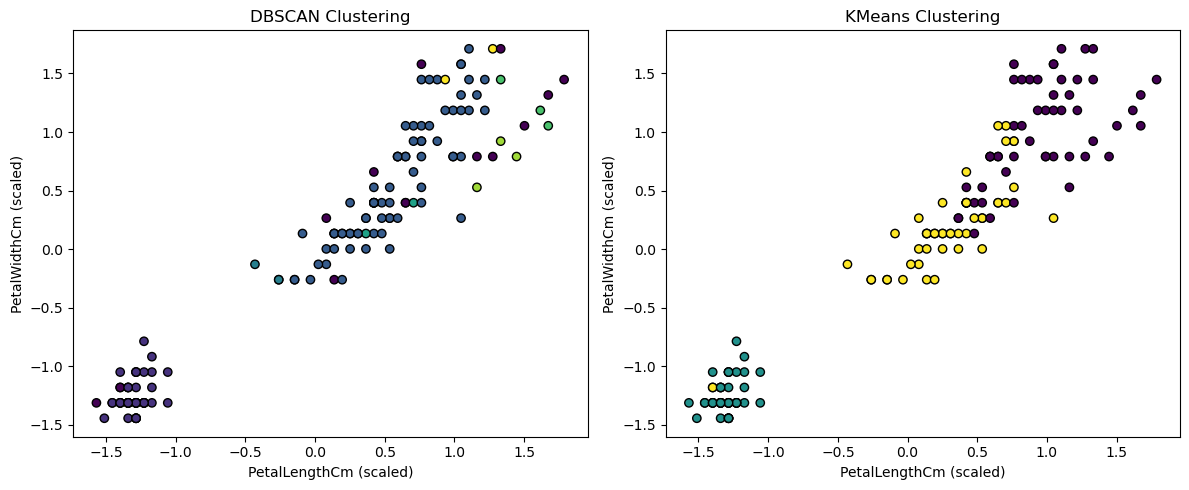

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN, KMeans
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset.
# (Make sure the file is named 'Iris.csv' and is in the current working directory.)
df = pd.read_csv('Iris.csv')

# We'll use only the numeric features for clustering.
features = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

# Standardize the features.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Run DBSCAN.
# eps and min_samples can be tuned; here we use typical values for the Iris dataset.
dbscan = DBSCAN(eps=0.5, min_samples=3)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Run KMeans with 3 clusters (since we expect three species).
kmeans = KMeans(n_clusters=3, random_state=2)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the dataframe.
df['DBSCAN_Cluster'] = dbscan_labels
df['KMeans_Cluster'] = kmeans_labels

# Print the cluster counts for each algorithm.
print("DBSCAN cluster counts:")
print(df['DBSCAN_Cluster'].value_counts())
print("\nKMeans cluster counts:")
print(df['KMeans_Cluster'].value_counts())

# Plot the clustering results based on Petal Length and Petal Width.
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_scaled[:, 2], X_scaled[:, 3], c=dbscan_labels, cmap='viridis', edgecolor='k')
plt.title('DBSCAN Clustering')
plt.xlabel('PetalLengthCm (scaled)')
plt.ylabel('PetalWidthCm (scaled)')

plt.subplot(1, 2, 2)
plt.scatter(X_scaled[:, 2], X_scaled[:, 3], c=kmeans_labels, cmap='viridis', edgecolor='k')
plt.title('KMeans Clustering')
plt.xlabel('PetalLengthCm (scaled)')
plt.ylabel('PetalWidthCm (scaled)')

plt.tight_layout()
plt.show()


- **DBSCAN** identified a large cluster of 73 points and a moderately sized one with 44 points, but it also labeled 18 points as noise and produced several very small clusters (each with 3 points). This suggests that DBSCAN, with its density-based approach, is sensitive to regions of varying density and can detect outliers, though it may fragment the data into many tiny clusters if the parameters aren't perfectly tuned.  
- **KMeans**, on the other hand, partitioned the data evenly into three clusters (55, 49, and 46 points) without recognizing any noise, as it forces every point into one of the specified clusters.  
- Overall, while KMeans gives a clean, fixed partitioning—which is ideal when you know there should be three clusters—DBSCAN offers the advantage of revealing noise and sub-structures but may require more careful parameter selection to avoid over-segmentation.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN, KMeans
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset.
# (Make sure the file is named 'Iris.csv' and is in the current working directory.)
df = pd.read_csv('delta.csv')

# We'll use only the numeric features for clustering.
features = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

# Standardize the features.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Run DBSCAN.
# eps and min_samples can be tuned; here we use typical values for the Iris dataset.
dbscan = DBSCAN(eps=0.5, min_samples=3)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Run KMeans with 3 clusters (since we expect three species).
kmeans = KMeans(n_clusters=3, random_state=2)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the dataframe.
df['DBSCAN_Cluster'] = dbscan_labels
df['KMeans_Cluster'] = kmeans_labels

# Print the cluster counts for each algorithm.
print("DBSCAN cluster counts:")
print(df['DBSCAN_Cluster'].value_counts())
print("\nKMeans cluster counts:")
print(df['KMeans_Cluster'].value_counts())

# Plot the clustering results based on Petal Length and Petal Width.
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_scaled[:, 2], X_scaled[:, 3], c=dbscan_labels, cmap='viridis', edgecolor='k')
plt.title('DBSCAN Clustering')
plt.xlabel('PetalLengthCm (scaled)')
plt.ylabel('PetalWidthCm (scaled)')

plt.subplot(1, 2, 2)
plt.scatter(X_scaled[:, 2], X_scaled[:, 3], c=kmeans_labels, cmap='viridis', edgecolor='k')
plt.title('KMeans Clustering')
plt.xlabel('PetalLengthCm (scaled)')
plt.ylabel('PetalWidthCm (scaled)')

plt.tight_layout()
plt.show()


## DBSCAN on Reduced_Delta

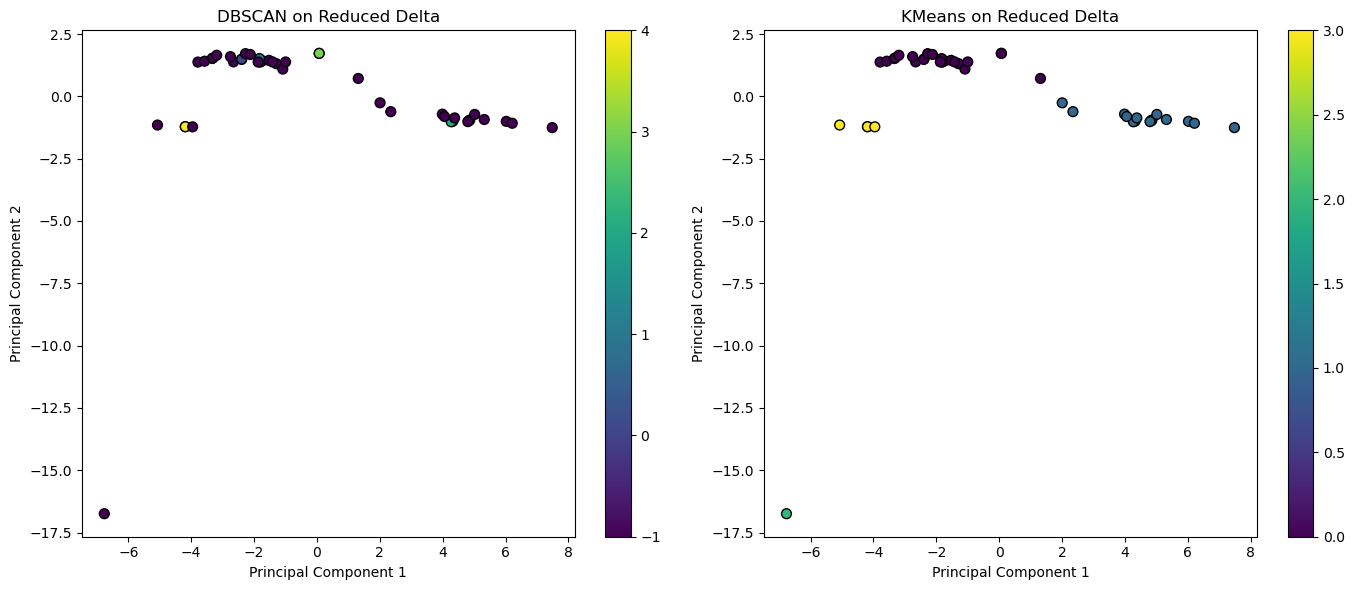

DBSCAN cluster counts:
Cluster -1: 34
Cluster 0: 2
Cluster 1: 2
Cluster 2: 2
Cluster 3: 2
Cluster 4: 2

KMeans cluster counts:
Cluster 0: 24
Cluster 1: 15
Cluster 2: 1
Cluster 3: 4


In [167]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN, KMeans

# --- Assume 'reduced' is your PCA-reduced Delta dataset ---
# For example:
# reduced = pca.transform(standardize(delta_df))

# Run DBSCAN on the reduced data.
# You might need to adjust eps and min_samples based on your data.
dbscan = DBSCAN(eps=0.2, min_samples=2)
dbscan_labels = dbscan.fit_predict(reduced)

# Run KMeans on the reduced data.
# Set the number of clusters to a value that makes sense for your data (e.g., 4).
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(reduced)

# Plot the clustering results.
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot DBSCAN results.
scatter0 = ax[0].scatter(reduced[:, 0], reduced[:, 1], c=dbscan_labels,
                           cmap='viridis', edgecolor='k', s=50)
ax[0].set_title("DBSCAN on Reduced Delta")
ax[0].set_xlabel("Principal Component 1")
ax[0].set_ylabel("Principal Component 2")
# Optionally, add a colorbar:
plt.colorbar(scatter0, ax=ax[0])

# Plot KMeans results.
scatter1 = ax[1].scatter(reduced[:, 0], reduced[:, 1], c=kmeans_labels,
                           cmap='viridis', edgecolor='k', s=50)
ax[1].set_title("KMeans on Reduced Delta")
ax[1].set_xlabel("Principal Component 1")
ax[1].set_ylabel("Principal Component 2")
plt.colorbar(scatter1, ax=ax[1])

plt.tight_layout()
plt.show()

# Print out cluster counts for further evaluation.
unique_dbscan, counts_dbscan = np.unique(dbscan_labels, return_counts=True)
unique_kmeans, counts_kmeans = np.unique(kmeans_labels, return_counts=True)

print("DBSCAN cluster counts:")
for label, count in zip(unique_dbscan, counts_dbscan):
    print(f"Cluster {label}: {count}")

print("\nKMeans cluster counts:")
for label, count in zip(unique_kmeans, counts_kmeans):
    print(f"Cluster {label}: {count}")


In [173]:
df = pd.read_csv('delta.csv', index_col='Aircraft')


In [175]:
df = pd.read_csv('delta.csv', index_col='Aircraft')
df.reset_index(inplace=True)


In [181]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(reduced)
df['DBSCAN_Cluster'] = dbscan_labels


In [183]:
print(df.columns)


Index(['Aircraft', 'Seat Width (Club)', 'Seat Pitch (Club)', 'Seat (Club)',
       'Seat Width (First Class)', 'Seat Pitch (First Class)',
       'Seats (First Class)', 'Seat Width (Business)', 'Seat Pitch (Business)',
       'Seats (Business)', 'Seat Width (Eco Comfort)',
       'Seat Pitch (Eco Comfort)', 'Seats (Eco Comfort)',
       'Seat Width (Economy)', 'Seat Pitch (Economy)', 'Seats (Economy)',
       'Accommodation', 'Cruising Speed (mph)', 'Range (miles)', 'Engines',
       'Wingspan (ft)', 'Tail Height (ft)', 'Length (ft)', 'Wifi', 'Video',
       'Power', 'Satellite', 'Flat-bed', 'Sleeper', 'Club', 'First Class',
       'Business', 'Eco Comfort', 'Economy', 'DBSCAN_Cluster'],
      dtype='object')


In [185]:
# After ensuring the column exists:
cluster_groups = df.groupby('DBSCAN_Cluster').apply(lambda x: list(x.index))
print("DBSCAN Cluster Membership:")
print(cluster_groups)


DBSCAN Cluster Membership:
DBSCAN_Cluster
-1    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
dtype: object


/var/folders/ph/vn1yxmc909ld_37rxq3d0g1h0000gn/T/ipykernel_3224/4240131925.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  cluster_groups = df.groupby('DBSCAN_Cluster').apply(lambda x: list(x.index))


In [189]:
# Assuming df is your DataFrame and 'Aircraft' and 'DBSCAN_Cluster' columns exist.
cluster_groups = df.groupby('DBSCAN_Cluster')['Aircraft'].apply(list)
print("DBSCAN Cluster Membership:")
print(cluster_groups)

# Similarly for KMeans
#cluster_groups_kmeans = df.groupby('KMeans_Cluster')['Aircraft'].apply(list)
#print("\nKMeans Cluster Membership:")
#print(cluster_groups_kmeans)


DBSCAN Cluster Membership:
DBSCAN_Cluster
-1    [Airbus A319, Airbus A319 VIP, Airbus A320, Ai...
Name: Aircraft, dtype: object


In [197]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Read the Delta dataset; here 'Aircraft' is used as the index.
df = pd.read_csv('delta.csv', index_col='Aircraft')

# Select only numeric columns for clustering.
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Standardize the numeric features.
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numeric_columns])

# Apply PCA using 4 components to capture a broader view of the variance.
pca = PCA(n_components=4)
reduced = pca.fit_transform(scaled_data)

# Use KMeans to cluster the reduced data into 4 clusters (based on our elbow method).
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(reduced)

# Add the KMeans cluster labels to the original DataFrame.
df['KMeans_Cluster'] = kmeans_labels

# Group the aircraft by cluster. Since 'Aircraft' is the index, we group by the cluster column and output the index.
cluster_groups = df.groupby('KMeans_Cluster').apply(lambda group: list(group.index))

print("Aircraft grouped by KMeans clusters:")
pd.set_option('display.max_colwidth', None)
print(cluster_groups)


Aircraft grouped by KMeans clusters:
KMeans_Cluster
0    [Airbus A319, Airbus A320, Airbus A320 32-R, Boeing 717, Boeing 737-700 (73W), Boeing 737-800 (738), Boeing 737-800 (73H), Boeing 737-900ER (739), Boeing 757-200 (75A), Boeing 757-200 (75M), Boeing 757-200 (75N), Boeing 757-200 (757), Boeing 757-200 (75V), Boeing 757-300, Boeing 767-300 (76P), Boeing 767-300 (76Q), Boeing 767-300 (76U), CRJ 700, CRJ 900, E170, E175, MD-88, MD-90, MD-DC9-50]
1                                                                           [Airbus A330-200, Airbus A330-200 (3L2), Airbus A330-200 (3L3), Airbus A330-300, Boeing 747-400 (74S), Boeing 757-200 (75E), Boeing 757-200 (75X), Boeing 767-300 (76G), Boeing 767-300 (76L), Boeing 767-300 (76T), Boeing 767-300 (76Z V.1), Boeing 767-300 (76Z V.2), Boeing 767-400 (76D), Boeing 777-200ER, Boeing 777-200LR]
2                                                                                                                                                     

/var/folders/ph/vn1yxmc909ld_37rxq3d0g1h0000gn/T/ipykernel_3224/2451554944.py:29: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  cluster_groups = df.groupby('KMeans_Cluster').apply(lambda group: list(group.index))


In [215]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Read the Delta dataset with 'Aircraft' as the index.
df = pd.read_csv('delta.csv', index_col='Aircraft')

# Select only numeric columns for clustering.
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Standardize the numeric features.
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numeric_columns])

# Apply PCA using 4 components to capture more variance.
pca = PCA(n_components=4)
reduced = pca.fit_transform(scaled_data)

# Run DBSCAN on the reduced data.
# Adjust eps and min_samples as needed for your dataset.
dbscan = DBSCAN(eps=1, min_samples=5)
dbscan_labels = dbscan.fit_predict(reduced)

# Add the DBSCAN cluster labels to the DataFrame.
df['DBSCAN_Cluster'] = dbscan_labels

# Group the aircraft by DBSCAN cluster.
dbscan_groups = df.groupby('DBSCAN_Cluster').apply(lambda group: list(group.index))

# Optionally, adjust pandas display settings to see full output.
pd.set_option('display.max_colwidth', None)

print("Aircraft grouped by DBSCAN clusters:")
print(dbscan_groups)


Aircraft grouped by DBSCAN clusters:
DBSCAN_Cluster
-1    [Airbus A319 VIP, Airbus A330-200 (3L2), Airbus A330-300, Boeing 737-700 (73W), Boeing 737-800 (738), Boeing 737-800 (73H), Boeing 747-400 (74S), Boeing 757-200 (75E), Boeing 757-200 (75X), Boeing 767-300 (76G), Boeing 767-300 (76P), Boeing 767-300 (76Q), Boeing 767-300 (76U), Boeing 767-300 (76Z V.2), CRJ 100/200 Pinnacle/SkyWest, CRJ 100/200 ExpressJet, E120, ERJ-145]
 0                                                                                                                   [Airbus A319, Airbus A320, Airbus A320 32-R, Boeing 717, Boeing 737-900ER (739), Boeing 757-200 (75A), Boeing 757-200 (75M), Boeing 757-200 (75N), Boeing 757-200 (757), Boeing 757-200 (75V), Boeing 757-300, CRJ 700, CRJ 900, E170, E175, MD-88, MD-90, MD-DC9-50]
 1                                                                                                                                                                                            

/var/folders/ph/vn1yxmc909ld_37rxq3d0g1h0000gn/T/ipykernel_3224/398616062.py:30: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dbscan_groups = df.groupby('DBSCAN_Cluster').apply(lambda group: list(group.index))


In [314]:
#I looked into how these aircrafts should actually be divided:
# Define lists for each category

# Regional/Small Jets (typically used for short routes and lower capacity)
regional = [
    "Airbus A319",
    "Airbus A319 VIP",
    "Boeing 717",
    "CRJ 100/200 Pinnacle/SkyWest",
    "CRJ 100/200 ExpressJet",
    "CRJ 700",
    "CRJ 900",
    "E120",
    "E170",
    "E175",
    "ERJ-145",
    "MD-88",
    "MD-90",
    "MD-DC9-50"
]

# Narrow-Body Jets (typically single-aisle aircraft for medium capacity routes)
narrow_body = [
    "Airbus A320",
    "Airbus A320 32-R",
    "Boeing 737-700 (73W)",
    "Boeing 737-800 (738)",
    "Boeing 737-800 (73H)",
    "Boeing 737-900ER (739)",
    "Boeing 757-200 (75A)",
    "Boeing 757-200 (75E)",
    "Boeing 757-200 (75M)",
    "Boeing 757-200 (75N)",
    "Boeing 757-200 (757)",
    "Boeing 757-200 (75V)",
    "Boeing 757-200 (75X)",
    "Boeing 757-300"
]

# Wide-Body Jets (typically twin-aisle, higher capacity and longer range)
wide_body = [
    "Airbus A330-200",
    "Airbus A330-200 (3L2)",
    "Airbus A330-200 (3L3)",
    "Airbus A330-300",
    "Boeing 747-400 (74S)",
    "Boeing 767-300 (76G)",
    "Boeing 767-300 (76L)",
    "Boeing 767-300 (76P)",
    "Boeing 767-300 (76Q)",
    "Boeing 767-300 (76T)",
    "Boeing 767-300 (76U)",
    "Boeing 767-300 (76Z V.1)",
    "Boeing 767-300 (76Z V.2)",
    "Boeing 767-400 (76D)",
    "Boeing 777-200ER",
    "Boeing 777-200LR"
]

# Print out each group
print("Regional/Small Jets:")
for jet in regional:
    print(" -", jet)

print("\nNarrow-Body Jets:")
for jet in narrow_body:
    print(" -", jet)

print("\nWide-Body Jets:")
for jet in wide_body:
    print(" -", jet)


Regional/Small Jets:
 - Airbus A319
 - Airbus A319 VIP
 - Boeing 717
 - CRJ 100/200 Pinnacle/SkyWest
 - CRJ 100/200 ExpressJet
 - CRJ 700
 - CRJ 900
 - E120
 - E170
 - E175
 - ERJ-145
 - MD-88
 - MD-90
 - MD-DC9-50

Narrow-Body Jets:
 - Airbus A320
 - Airbus A320 32-R
 - Boeing 737-700 (73W)
 - Boeing 737-800 (738)
 - Boeing 737-800 (73H)
 - Boeing 737-900ER (739)
 - Boeing 757-200 (75A)
 - Boeing 757-200 (75E)
 - Boeing 757-200 (75M)
 - Boeing 757-200 (75N)
 - Boeing 757-200 (757)
 - Boeing 757-200 (75V)
 - Boeing 757-200 (75X)
 - Boeing 757-300

Wide-Body Jets:
 - Airbus A330-200
 - Airbus A330-200 (3L2)
 - Airbus A330-200 (3L3)
 - Airbus A330-300
 - Boeing 747-400 (74S)
 - Boeing 767-300 (76G)
 - Boeing 767-300 (76L)
 - Boeing 767-300 (76P)
 - Boeing 767-300 (76Q)
 - Boeing 767-300 (76T)
 - Boeing 767-300 (76U)
 - Boeing 767-300 (76Z V.1)
 - Boeing 767-300 (76Z V.2)
 - Boeing 767-400 (76D)
 - Boeing 777-200ER
 - Boeing 777-200LR


## Conclusion 
Both clustering methods roughly align with our domain-based grouping, but there are some interesting differences. For instance, KMeans produced four clusters: one large group (cluster 0) that mostly includes narrow-body jets (such as the A319, A320 series, and several Boeing narrow-body models), one cluster (cluster 1) containing most of the wide-body jets (like the A330 family, 747, 767, and 777 models), and two smaller clusters that seem to capture the specialized or regional jets (cluster 2 with Airbus A319 VIP and cluster 3 with the CRJ series, E120, and ERJ-145). In contrast, DBSCAN—after adjusting its parameters—also separated the aircraft into broad categories but marked some aircraft as noise (label -1) and showed a more fragmented grouping. This fragmentation likely arises from DBSCAN’s sensitivity to local density, which can cause overlapping categories to be split apart. Overall, KMeans appears to produce groupings that are more in line with our expected operational categories, while DBSCAN offers additional insights into potential outliers or overlapping segments in the data.

# Movements Dataset

In [229]:
df = pd.read_csv('movements.csv', index_col=0)
print('Dataset Shape:', df.shape)
print(df.head())

Dataset Shape: (60, 963)
                  2010-01-04  2010-01-05  2010-01-06  2010-01-07  2010-01-08  \
Apple               0.580000   -0.220005   -3.409998   -1.170000    1.680011   
AIG                -0.640002   -0.650000   -0.210001   -0.420000    0.710001   
Amazon             -2.350006    1.260009   -2.350006   -2.009995    2.960006   
American express    0.109997    0.000000    0.260002    0.720002    0.190003   
Boeing              0.459999    1.770000    1.549999    2.690003    0.059997   

                  2010-01-11  2010-01-12  2010-01-13  2010-01-14  2010-01-15  \
Apple              -2.689994   -1.469994    2.779997   -0.680003   -4.999995   
AIG                -0.200001   -1.130001    0.069999   -0.119999   -0.500000   
Amazon             -2.309997   -1.640007    1.209999   -1.790001   -2.039994   
American express   -0.270001    0.750000    0.300004    0.639999   -0.130001   
Boeing             -1.080002    0.360000    0.549999    0.530002   -0.709999   

             

In [231]:
#standardize 
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

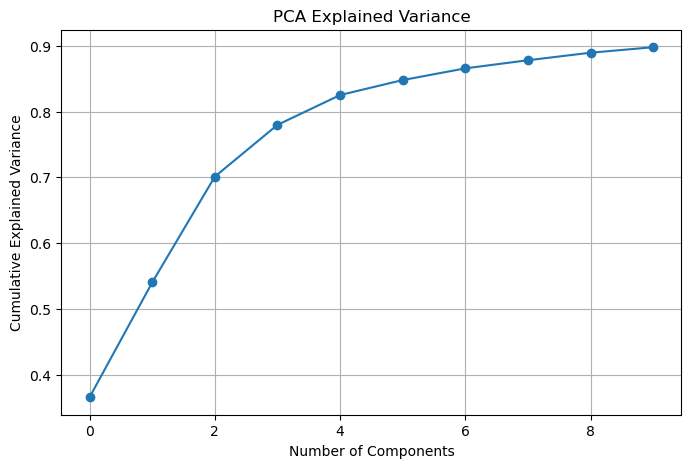

In [237]:
pca_full = PCA (n_components = 10)
pca_full.fit(scaled_data)
explained = pca_full.explained_variance_ratio_

plt.figure(figsize=(8,5))
plt.plot(np.cumsum(explained), marker = 'o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.grid(True)
plt.show()

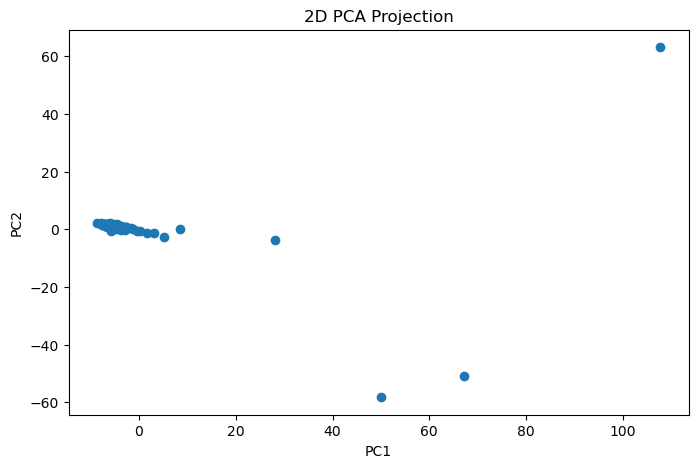

In [249]:
# Reduce to 3 components for clustering (but use 2 for plotting)
pca_4 = PCA(n_components=3)
reduced_4 = pca_4.fit_transform(scaled_data)

# For visualization, reduce to 2 components
pca_2 = PCA(n_components=2)
reduced_2 = pca_2.fit_transform(scaled_data)

plt.figure(figsize=(8, 5))
plt.scatter(reduced_2[:, 0], reduced_2[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('2D PCA Projection')
plt.show()


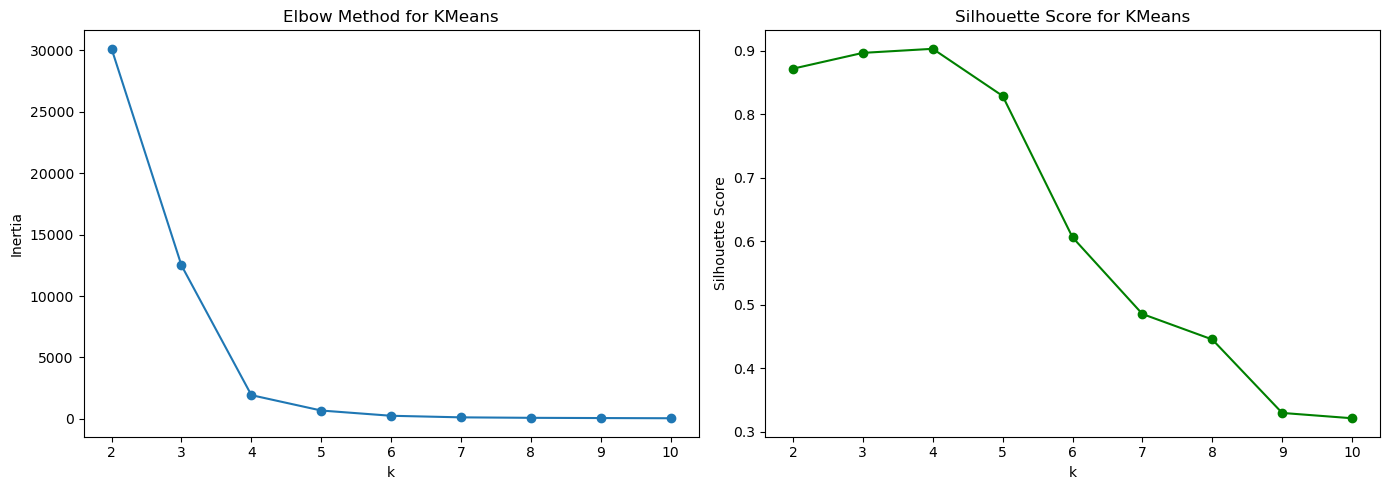

In [251]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertia = []
silhouette = []
ks = range(2, 11)  # start at 2 because 1 is trivial

for k in ks:
    km = KMeans(n_clusters=k, random_state=9)
    labels = km.fit_predict(reduced_4)  # using the 4-component data
    inertia.append(km.inertia_)
    silhouette.append(silhouette_score(reduced_4, labels))
    
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(ks, inertia, marker='o')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method for KMeans')

plt.subplot(1, 2, 2)
plt.plot(ks, silhouette, marker='o', color='green')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for KMeans')

plt.tight_layout()
plt.show()


In [253]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=2)
kmeans_labels = kmeans.fit_predict(reduced_4)
df['KMeans_Cluster'] = kmeans_labels


In [255]:
from sklearn.cluster import DBSCAN

# Try a few eps values, for example, 0.8 or 1.0
dbscan = DBSCAN(eps=1.0, min_samples=5)
dbscan_labels = dbscan.fit_predict(reduced_4)
df['DBSCAN_Cluster'] = dbscan_labels


In [257]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=k)
agg_labels = agg.fit_predict(reduced_4)
df['Agglomerative_Cluster'] = agg_labels


In [259]:
# For clarity, reset the display option if necessary:
import pandas as pd
pd.set_option('display.max_colwidth', None)

kmeans_groups = df.groupby('KMeans_Cluster').apply(lambda group: list(group.index))
dbscan_groups = df.groupby('DBSCAN_Cluster').apply(lambda group: list(group.index))
agg_groups = df.groupby('Agglomerative_Cluster').apply(lambda group: list(group.index))

print("KMeans Cluster Groups:")
print(kmeans_groups)
print("\nDBSCAN Cluster Groups:")
print(dbscan_groups)
print("\nAgglomerative Clustering Groups:")
print(agg_groups)


KMeans Cluster Groups:
KMeans_Cluster
0    [AIG, Amazon, American express, Boeing, Bank of America, British American Tobacco, Canon, Caterpillar, Colgate-Palmolive, ConocoPhillips, Cisco, Chevron, DuPont de Nemours, Dell, Ford, General Electrics, Goldman Sachs, GlaxoSmithKline, Home Depot, Honda, HP, IBM, Intel, Johnson & Johnson, JPMorgan Chase, Kimberly-Clark, Coca Cola, Lookheed Martin, McDonalds, 3M, Microsoft, Mitsubishi, Navistar, Northrop Grumman, Novartis, Pepsi, Pfizer, Procter Gamble, Philip Morris, Royal Dutch Shell, SAP, Schlumberger, Sony, Sanofi-Aventis, Symantec, Toyota, Total, Taiwan Semiconductor Manufacturing, Texas instruments, Unilever, Valero Energy, Walgreen, Wells Fargo, Wal-Mart, Exxon, Xerox, Yahoo]
1                                                                                                                                                                                                                                                                         

/var/folders/ph/vn1yxmc909ld_37rxq3d0g1h0000gn/T/ipykernel_3224/86989057.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  kmeans_groups = df.groupby('KMeans_Cluster').apply(lambda group: list(group.index))
/var/folders/ph/vn1yxmc909ld_37rxq3d0g1h0000gn/T/ipykernel_3224/86989057.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dbscan_groups = df.groupby('DBSCAN_Cluster').apply(lambda group: list(group.

## Conclusion

- **KMeans and Agglomerative Clustering:** Both methods produced very similar groupings—one large cluster containing almost all companies, and three single-company clusters isolating Google/Alphabet, Apple, and MasterCard. This suggests that, overall, most companies in the movements dataset exhibit similar behavior, while these three companies stand out as having distinct movement patterns.

- **DBSCAN:** In contrast, DBSCAN separated the data into one large cluster and a “noise” cluster (labeled -1) that includes not only Apple, Google/Alphabet, and MasterCard but also several other companies (such as AIG, Amazon, and Boeing) that DBSCAN considered too sparse or outlying relative to the main group. This discrepancy highlights how DBSCAN’s sensitivity to its parameters (like `eps` and `min_samples`) can result in many points being labeled as noise when the overall density is not uniform.

Overall, the results indicate that while the majority of companies behave similarly, a few key players (Apple, Google/Alphabet, and MasterCard) consistently emerge as outliers. The partitioning methods (KMeans and Agglomerative) provide clear separations, whereas DBSCAN’s density-based approach reveals a more nuanced picture by identifying additional outliers.

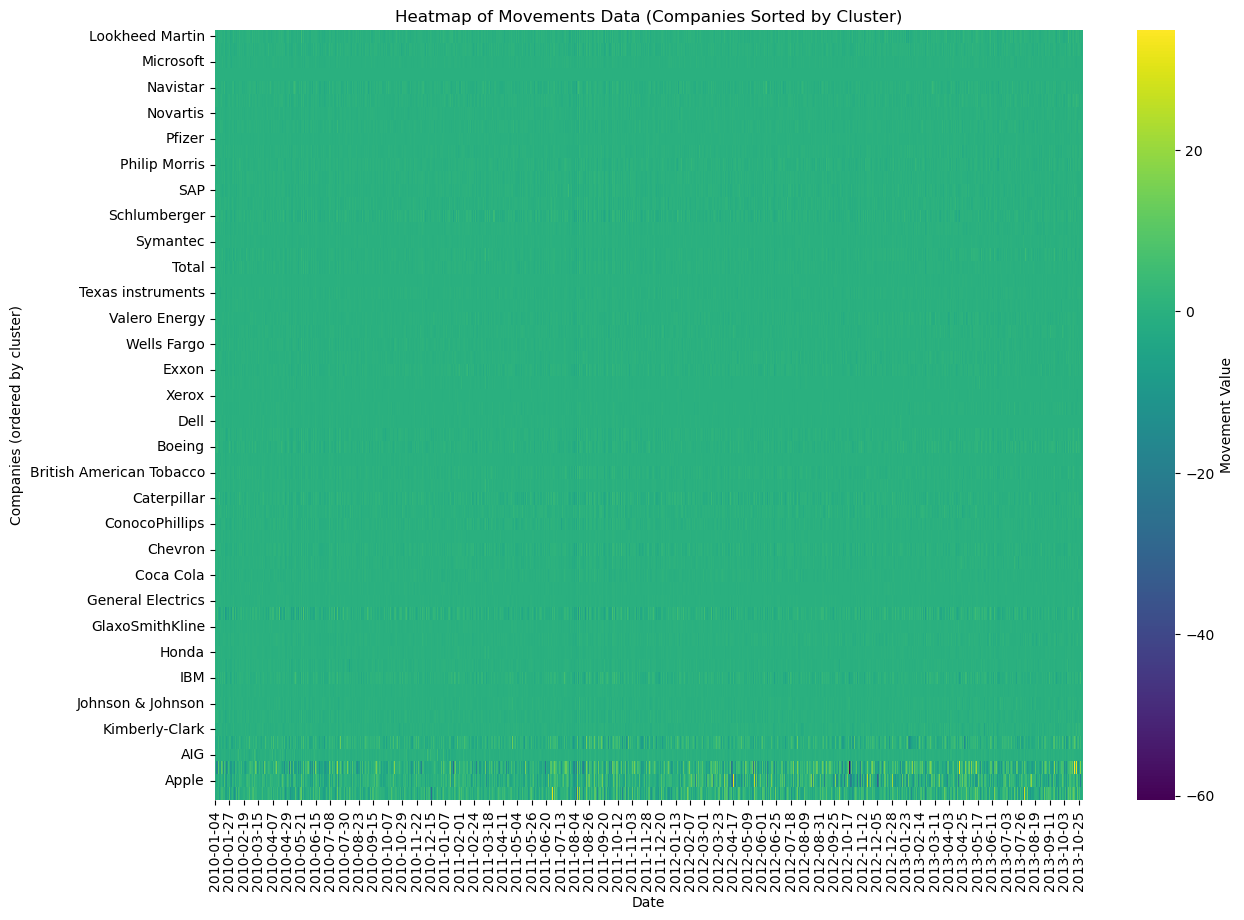

In [265]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assume df already has a column 'KMeans_Cluster' from your clustering results.
# Sort the DataFrame by the cluster label for better visualization.
df_sorted = df.sort_values('KMeans_Cluster')

plt.figure(figsize=(14, 10))
# Drop the cluster column so only the time series data remains.
sns.heatmap(df_sorted.drop(columns=['KMeans_Cluster']), cmap='viridis', cbar_kws={'label': 'Movement Value'})
plt.title("Heatmap of Movements Data (Companies Sorted by Cluster)")
plt.xlabel("Date")
plt.ylabel("Companies (ordered by cluster)")
plt.show()


I just wanted to see if the previosu classification makes sense but it appears that most companies do indeed follow the same movement

Run DBSCAN on Iris.csv and compare/discuss the results with K-Means. Please submit your code and output, and write down 3-4 sentences that you observed from the results.


Run DBSCAN on Reduced_Delta dataset and compare/discuss the results with K-Means. Please submit your code and output, and write down 3-4 sentences that you observed from the results.

Run KMeans on movements.csv compare/discuss the results with DBSCAN and Hierarchical Clustering (Agglomerative). Please submit your code and output, and write down 3-4 sentences that you observed from the results


### Problem 4

Apply t-SNE reduction to delta.csv file and compare/discuss the results with PCA. Please submit your code and output, and write down 3-4 sentences that you observed from the results.

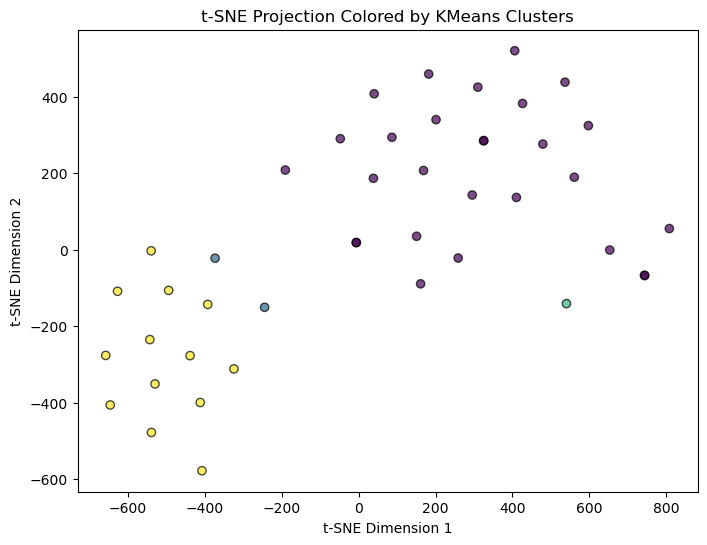

In [347]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Load delta.csv, assuming 'Aircraft' is the index.
df = pd.read_csv('delta.csv', index_col='Aircraft')

# Select numeric columns.
numeric_cols = df.select_dtypes(include=[np.number]).columns
data = df[numeric_cols]

# Standardize the data.
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
#print("Scaled data shape:", scaled_data.shape)  # Should match the number of rows in df (e.g., (N, features))

# Run KMeans for clustering (assuming k=4 as an example).
kmeans = KMeans(n_clusters=4, random_state=9)
kmeans_labels = kmeans.fit_predict(scaled_data)
#print("KMeans labels shape:", kmeans_labels.shape)  # Expect (N,)

# Apply t-SNE on the same scaled_data.
tsne = TSNE(n_components=2, perplexity=20, learning_rate=200, max_iter=2000, random_state=1)
tsne_result = tsne.fit_transform(scaled_data)
#print("t-SNE result shape:", tsne_result.shape)  # Expect (N, 2)

# Plot t-SNE result colored by kmeans_labels.
plt.figure(figsize=(8, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.7, edgecolor='k')
plt.title('t-SNE Projection Colored by KMeans Clusters')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()


## Conclusion 

- The t‑SNE visualization consistently separated the data into three distinct groups, even after adjusting the perplexity in incremements of 5 from 5-30. This suggests that there are subtle local structures within the dataset.  
- One of these groups is notably small (only 4 points), indicating that a subset of aircraft exhibits uniquely different behavior compared to the majority.  
- Overall, while PCA provides a reliable global view of the data’s variance, t‑SNE uncovers finer, local patterns that may offer additional insights into the underlying characteristics of the aircraft.

### Problem 5 (Bonus)

Apply Hiearchical Clustering to delta.csv and observe how physical features are being clustered in ealry leaves at the bottom. Please submit your code and dendrogram graph along with 1-2 sentences interpretation.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler


df = pd.read_csv('nba_stats.csv', inde_col = 'Player')
numeric_data = df.select_dtypes(include=[np.number])
scaler = StandardScaler()
scaled_data = scaler.fittransform(numeric_data)
z = linkage(scaled_data.T, )



Original dataset shape: (44, 33)
Numeric features shape: (44, 33)


<Figure size 1200x800 with 0 Axes>

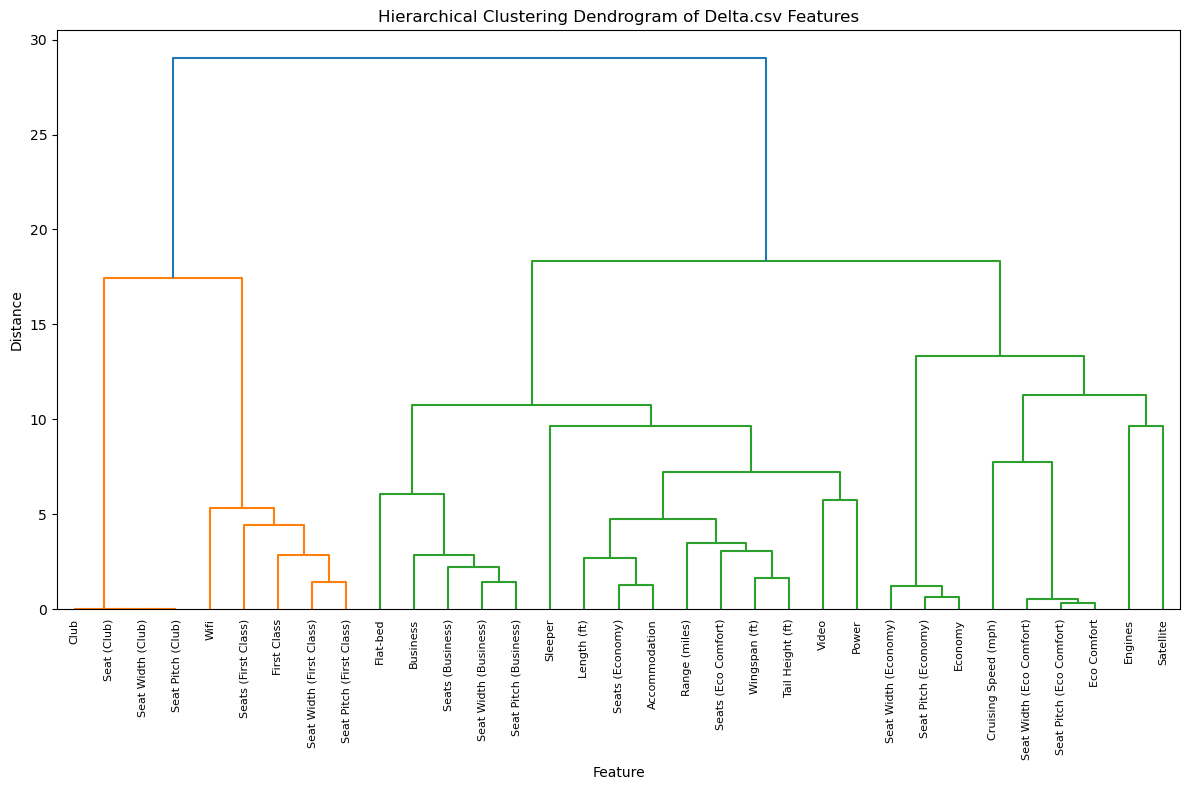

In [358]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

# 1. Load the dataset (using 'Aircraft' as index)
df = pd.read_csv('delta.csv', index_col='Aircraft')
print("Original dataset shape:", df.shape)

# 2. Select only numeric features (these include both physical and non-physical measures)
numeric_data = df.select_dtypes(include=[np.number])
print("Numeric features shape:", numeric_data.shape)

# 3. Standardize the numeric data (features are columns)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# 4. Cluster the features: we transpose scaled_data so each row is now a feature.
# Using Ward linkage, which is common for hierarchical clustering.
Z = linkage(scaled_data.T, method='ward')

# 5. Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(Z, labels=numeric_data.columns, leaf_rotation=90)
plt.title("Hierarchical Clustering Dendrogram of Delta.csv Features")
plt.xlabel("Feature")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()


The hierarchical clustering analysis of Delta's aircraft features reveals distinct groupings, highlighting key differences in seating classes and aircraft specifications. **Club and First-Class amenities** (e.g., seat width, seat pitch, WiFi) form a clearly separate cluster, indicating their premium nature. **Business Class**, while more similar to First-Class, sits between Economy and luxury seating in terms of features. **Economy seating closely aligns with aircraft specifications** such as range, wingspan, and cruising speed, suggesting that its design is more constrained by aircraft dimensions and performance. Additionally, **technology-related attributes** like satellite and engine features stand apart, reflecting their independence from seating configurations. This clustering provides insight into how Delta's aircraft are structured to balance comfort, capacity, and operational efficiency.

###  AI Integration (Bonus)
In this section, You are encouraged to leverage AI tools such as [GitHub Copilot](https://github.com/features/copilot?ef_id=_k_CjwKCAiAmfq6BhAsEiwAX1jsZxny5HvB9RHCxCn_RylGQUQVNKPtXsCxrVIsQKdKoFUCq2nEpAgrthoCaJcQAvD_BwE_k_&OCID=AIDcmmb150vbv1_SEM__k_CjwKCAiAmfq6BhAsEiwAX1jsZxny5HvB9RHCxCn_RylGQUQVNKPtXsCxrVIsQKdKoFUCq2nEpAgrthoCaJcQAvD_BwE_k_&gad_source=1&gclid=CjwKCAiAmfq6BhAsEiwAX1jsZxny5HvB9RHCxCn_RylGQUQVNKPtXsCxrVIsQKdKoFUCq2nEpAgrthoCaJcQAvD_BwE), Open AI GPT models, Gemini or [Bito.ai](https://bito.ai/product/ai-code-review-agent/?utm_source=google+search&utm_medium=paid+search&utm_campaign=ai_code_review_agent_git&utm_term=automated%20code%20review&utm_campaign=Q4+%7C+AI+Code+Review+Agent+%7C+Git&utm_source=adwords&utm_medium=ppc&hsa_acc=8495629704&hsa_cam=21875716488&hsa_grp=172912528951&hsa_ad=720199442575&hsa_src=g&hsa_tgt=kwd-336685973&hsa_kw=automated%20code%20review&hsa_mt=b&hsa_net=adwords&hsa_ver=3&gad_source=1&gclid=CjwKCAiAmfq6BhAsEiwAX1jsZ5byhkMPTFUlRVODbIOv7hOpXBu2tNsgGHuuNWlktU9nbgQZ-5jzIhoCzpcQAvD_BwE) to enhance your code quality. Tasks include:

**Unit Testing:**

Use AI to suggest additional test cases for the functions you have implemented, such as:



*   plot_pairgrid()
*   fit_pca()
*   cluster()





Compare the AI-generated test cases to those provided and document how they improve coverage or identify edge cases.


**Documentation:**

Utilize AI to generate inline comments and high-level descriptions for your functions. For instance:
* Describe the purpose of standardize() and its importance in PCA.
* Document how the cluster() function predicts clusters and handles inputs.

Compare AI-generated documentation to your own and note any improvements.

**Code Optimization:**

* Ask AI to refactor one of your implemented functions (e.g., plot_scaled_variance()) for better performance or readability.
* Implement the AI-suggested improvements and document their impact.


**Comparative Analysis:**

For any AI-generated solutions, conduct a comparison:
* Does the AI-suggested code perform better? Why or why not?
* If you choose not to implement AI recommendations, provide reasoning.

**Submission Instructions:**
Submit your original code alongside the AI-enhanced code.
Include a brief write-up summarizing:
* How AI helped in improving your unit testing, documentation, or optimization.
* Any challenges faced while integrating AI-generated suggestions.